# Scipy Stats & Anova

This Jupyter Notebook is part of Brian Doheny's submission for the 2021/22 Machine Learning module at Galway-Mayo Insitute of Technology.

In this notebook you will find an introduction to the Scipy.Stats Python library, alongside explanations and examples of the ANOVA analysis technique.

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/OtherBrian/machine-learning/blob/main/scipy_stats.ipynb)

### Binder link here

# What is Scipy?

Scipy is an open source Python library that allows users to perform a multitude of science related programming (https://scipy.github.io/devdocs/tutorial/index.html#user-guide), and is one of the foundations of the Python Data Science toolkit for analysts, data scientists and more. As with many such libraries Scipy is built with Numpy in mind, and like Numpy, Scipy is built to be fast so that it can handle large amounts of data quickly and effectively (https://scipy.org/). 

While Scipy can be used for tasks such as optimization, integration and multidimensional image processing(, in this notebook I will be concentrating on the Stats subpackage. 

## Scipy.Stats

The Scipy.Stats sub-package provides functionality for statistical analyses, and is home to the Python implementations of many of the statistical tests that analysts and data scientists need in their day to day work. For example, the T-Test (https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), Chi Square Test (https://scipy.github.io/devdocs/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare) and ANOVA (https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway) can all be found within Scipy.Stats alongside many more.

As well as these tests, Scipy also offers an extended range of summary and frequency statistics that are otherwise not available in Numpy. For example, one use Numpy to get the mean, median and such for their array, but will have to use Scipy.Stats if they wish to measure the kurtosis (https://scipy.github.io/devdocs/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis) or skew (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) of that array.

Scipy also offers functionality for generating random data according to various probability distributions, offering a wider range than is otherwise available via Numpy.Random, such as mysterious sounding Crystalball Distribution (https://scipy.github.io/devdocs/reference/generated/scipy.stats.crystalball.html#scipy.stats.crystalball). Users can also transform their data so that it fits specific statistical tests via functions such as Box-Cox(https://scipy.github.io/devdocs/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox) or Yeo-Johnson (https://scipy.github.io/devdocs/reference/generated/scipy.stats.yeojohnson.html#scipy.stats.yeojohnson).

Throughout the remainder of this notebook, I will be focusing on Scipy.Stats ANOVA functionality. This includes the ANOVA (https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway) test itself, the tests to confirm that ANOVA is suitable for the given dataset, and some variations of ANOVA to be used when ANOVA conditions are not totally ideal.

# ANOVA (Analysis of Variance)

## What is ANOVA?

Analysis of Variance tests, more commonly referred to as ANOVA, is a statistical test that is used to check whether two or more groups from within a given population have significant differences. It does this by comparing the variance of the observations within each group as well as taking the mean value of each group into account(https://www.qualtrics.com/uk/experience-management/research/anova/), and producing an F statistic which can be used to derive a P-Value. This P-Value tells us what probability there would be of getting such an extreme F statistic purely by chance (i.e. if there were no actual difference between the two groups) (https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/), and so it's common practice to accepted a P-Value less than 0.05 as being "statistically significant", as it represents a less than 5% probability that these results were due to chance. Some industries or use-cases may require somewhat different P-Value thresholds, depending on the risks of a Type 1 or Type 2 error.

## Hypothesis Testing

When running experiments or performing observational analysis on different groups, such as would be the case with ANOVA, we must start off with a hypothesis that we wish to test for. This hypothesis clearly details the difference we expect to see from the treatment, or across the various groups, and thus clarifies exactly which measure will be used in the statistical tests to be performed (i.e. ANOVA in this case). For example, in a randomized drug test the hypothesis may be that the drug lowers the blood pressure of the people taking the drug after a certain amount of time.

### Null and Alternate Hypothesis

With our initial hypothesis detailing what we expect to see, we can then create a null hypothesis and an alternate hypothesis. The alternate hypothesis is simply that change that you anticipate. So in my prior example, the alternate hypothesis would be "patients that take this drug have lower blood pressure by 5% after X amount of time".

Meanwhile the Null Hypothesis is opposite of the Alternate Hypothesis, and stats that there is no change or meaningful difference between groups. In the drug trial example, the null hypothesis would be "patients that take this drug see no change in their blood pressure after x amount of time".

As the analysis is performed, it is the null hypothesis that is assumed to be true until we find statistically significant evidence that it can be rejected and the alternate hypothesis accepted. It should be noted that the term "hypothesis" is used here for good reason, as rejecting the null hypothesis does not necessarily mean that the alternate hypothesis is the true cause of the change or difference, but that without other alternative hypotheses it can be accepted until such a time as it to is rejected.

This is where the P-Value kicks in. The P-Value tells us the probability of having encountered results as extreme as the results found in the given analysis if there were no notable difference. If the P-Value is high, then the probability of the results being down to chance is high, and therefore there isn't sufficient evidence to reject the null hypothesis. However, if the P-Value is low (usually below 0.05) then the null hypothesis can be confidently rejected, and the alternate hypothesis accepted. 

The null hypothesis and threshold for the P-Value is set before the experiment or analysis begins, so as to prevent "P-Hacking" whereby results can be massaged or thresholds changed in order to promote a seemingly stastically significant result, that otherwise wouldn't have rejected the null hypothesis (https://scienceinthenewsroom.org/resources/statistical-p-hacking-explained/). P-Hacking is not neccessarily a conscious decision, as our own biases can mean we accept results that otherwise wouldn't be significant, and so it's important that we set the thresholds before we begin the analysis so that these errors don't crop up.

(https://www.analyticsvidhya.com/blog/2021/01/an-introduction-to-hypothesis-testing/)


### Type I & Type II Errors

We use P-Values as a threshold for whether or not to reject a null hypothesis, as it limits the likelihood of an error being made. In hypothesis testing, errors fall into two main categories known as Type I Errors and Type II Errors.

Type I Errors are false positive results. In these situations the null hypothesis would be rejected when it's actually the more correct of the two hypotheses. By setting a P-Value threshold of 5% or lower,  we will only reject the null hypothesis if our results would only be this extreme 5% or less of the time. This means we can at least be confident that our results at least 95% likely to be significant, and so the risk of a Type I error having occured is 5% or less. However, if P-hacking has taken place, then the likelihood of a Type I error increases.

Type II Errors are false negatives. In these situations the null hypothesis was not rejected, when it actually should. This may be due to the distribution of the observed samples not fully representing the population, or that the measure used in the analysis was not the one that was actually impacted. The risk of type II errors can be reduced by increasing the statistiacl power of the analysis by increaseing the sample size, increasing the size of the effect we are measuring for (e.g. instead of looking for a 5% improvement, look for 10%), or by raising the P-Value threshold (with obvious knock on effects for more potential Type 1 errors). 

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/errors.png?raw=true" alt="example of classifier" style="width: 600px;"/>

While analysts aim to avoid either error when designing their experiments, Type I errors are generally seen as the more critical of the two. This is because a Type I Error rejecting the null hypothesis, and thus accepting a new insight and possibly new actions as a result, whereas a Type II Error maintains the status quo. In most scenarios, taking action based on a Type I Error has the potential to cause more damage then carrying on with the status quo (as would be the case with a Type II error). This may not be true in all scenarios, as there may be situations where inaction is the larger risk.


https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

## When can we use ANOVA?

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

Not all datasets are suitable for a standard ANOVA analysis, and so there are six guiding assumptions that should apply to a dataset before applying the ANOVA technique. In the event that one or more of these guiding assumptions are not met, there may be alternative versions of ANOVA available, or else the analyst will have to explore other analysis techniques to use in their situation.

### 1. The dependent variable is continuous.

As ANOVA uses the mean and variance to compare the dependent variable in each group, it is therefore important that the dependent variable itself is continuous. For example variance generally cannot be measured on categorical variables, and so wouldn't provide one of the key measures necessary for ANOVA.

### 2. The independent variables are spread across at least 2 or 3 groups.

The goal with ANOVA is to see if the dependent variable is sufficiently different between each group within the dataset, and so it figures that we would need a few distinct groups to perform the analysis on. Therefore a minimum of 2 groups are required, although it should be noted that when there are just 2 groups present, we could use an T test instead of ANOVA. The benefits of ANOVA really kick in once we get to 3 groups or more.

### 3. Observations must be independent.

Each observation should not be impacted by the other observations in its own group, or in the groups around it. In the event that observations are not completely independent, we may see our results impacted by bias and external factors. For example if we look at the salary of three students after 15 years, these measures will be independent (most of the time) as the salary of one student should not impact the salary of another. However, if we are measuring how many grams of cake were eaten at a party by the three students, and there's a limited supply of cake, then we may see that one students cake eating capacity was hampered by the voraciousness of another student and thus the results would be misleading.

### 4. No significant outliers should be present within the dataset.

ANOVA uses variance and mean in order to compare the groups within the dataset, and so any outliers have the potential to significantly skew those two measures and thus impact the results. Using the students example above, if one of those students was Mark Zuckerberg then we might conclude that dropping out of college leads to the highest salary after 15 years.

### 5. The dependent variable should be normally distributed for each group.

As variance and mean are the two measures used to compare the groups, we should ensure that the distributions are approximately normally distributed. We can do this by plotting the dependent variable into a histogram for each group, or make use of some handy statistical tests which I'll be introducing later in this notebook.

### 6. There should be homogeneity of variances

Again, as Variance is one of the main measures being used for ANOVA, it's important that the variances are somewhat similar. If one of the groups has a variance that is significantly different to the others (i.e. very low and very high values) then it will impact the trustworthiness of our results.

As mentioned above, there are workarounds and other flavours of ANOVA available if one or more of these assumptions are not met. I will introduce some of these when we go through the Students dataset later. For now though, let's go through a dataset that is perfectly ideal for ANOVA and meets all of these assumptions - the diet dataset.

# Anova Examples

## The Diet Dataset - an ideal ANOVA toy dataset

To show how we can test for each of the above 6 assumptions, I'll first walk us through the Diet dataset. I have acquired this dataset from [Sheffield University's datasets for teaching](https://www.sheffield.ac.uk/mash/statistics/datasets). 

This dataset contains the details and measurements of 78 people that each went through a particular diet for a period of 6 weeks. The variables present include their gender, age, height, their weight prior to the diet starting, their weight after six weeks, and which diet they were on. There are 3 possible diets that an individual could be on, and there was no switching between the diets.

For this ANOVA analysis, we will look at the difference in weight before and after 6 weeks of the diet for the participants that were on each of the 3 diets.

Continuous dependent variable: change in weight (Pre diet weight - 6 week diet weight)
Independent categorical variables: Diet (1, 2 or 3).

First, I'll import the Python libraries that I'll be using to perform the ANOVA and to visualize the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

I'll now load the dataset into a Pandas dataframe.

In [2]:
diet_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/diet.csv')

print(f"There are {len(diet_df)} observations in this datset.")

diet_df.head()

There are 78 observations in this datset.


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


Immediately we can that the first two observations are missing data. They have no gender entered, and their pre.weight and weight6weeks values are exactly the same. I'm therefore assuming that for whatever reason these could not be completed, and so I will only include observations that have all values present.

In [3]:
# A few observations don't have a value for gender, and have no difference in pre/post weight. Removing these.
diet_df = diet_df[diet_df['gender'].isin(['0', '1'])]

print(f"There are now {len(diet_df)} observations in this datset.")


There are now 76 observations in this datset.


We've lost two observations, but 76 observations are still sufficient for what we need. We can also check how the observations are split between the groups.

In [4]:
# Check how many observations are in each group

diet_df['Diet'].value_counts()

3    27
2    25
1    24
Name: Diet, dtype: int64

At present our dataset shows the weight before the diet and after, whereas we want to see the change in weight, as that will be our dependent variable. I'll therefore create a new column called "weightChange" to calculate this.

In [5]:
# Going to measure the weight change from each diet 
diet_df['weightChange'] = diet_df['pre.weight'] - diet_df['weight6weeks']

diet_df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightChange
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8


Now that our dataset is cleaned (it was very clean already!), I'll create three copies of the dataframe, one for each of the three diets.

In [6]:
# Splitting into DataFrames for each of the diets.

diet1 = diet_df[diet_df['Diet'] == 1]
diet2 = diet_df[diet_df['Diet'] == 2]
diet3 = diet_df[diet_df['Diet'] == 3]

At this point the dataset has met assumptions 1 (continuous dependent variable), 2 (categorical indepedent variable) and 3 (observations must be dependent). In order to check for the remaining three assumptions, we'll need to explore the dataset a bit more.

### Exploratory Data Analysis

In order to check for significant outliers in our three dataframes, I'll now calculate their mean weightChange values and plot distribution each as a histogram. This will also give us some clue as to whether or not they are normally distributed. I'll include a Kernel Density Estimate on each histogram, as this will give us a bit more insight into how normal our three distributions actually are.

In [7]:
print(f"Average weightChange for diet1: {round(diet1['weightChange'].mean(),2)}")
print(f"Average weightChange for diet2: {round(diet2['weightChange'].mean(),2)}")
print(f"Average weightChange for diet3: {round(diet3['weightChange'].mean(),2)}")

Average weightChange for diet1: 3.3
Average weightChange for diet2: 3.27
Average weightChange for diet3: 5.15


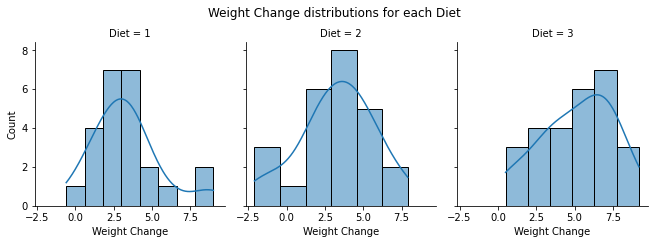

In [8]:
g = sns.FacetGrid(diet_df, col="Diet")
g.map_dataframe(sns.histplot, x="weightChange", kde=True)
g.set_axis_labels("Weight Change", "Count")
g.fig.suptitle("Weight Change distributions for each Diet", y=1.05);

While each group has a slightly different shape, we don't see any outliers on either of them. We can therefore say that assumption 4 (no outliers) has also been met. 

All three histograms also look appropriately normally distributed, with Diet 3 generally having larger values, and the larger mean. To confirm that these are normally distributed, we can utilize the Shapiro-Wilk test of normality. This null hypothesis for this test is that the data comes from a normal distribution. Therefore is the P-value is below 0.05, we would assume that the null hypothesis is false and that the data therefore does not come from a normal distribution. (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) 

Fortunately, Scipy.Stats is able to perform the Shapiro-Wilk test for us. Remember, we're hoping that the P-value is above 0.05, as that would mean that the data comes from a normal distribution and thus meets assumption 5.

In [9]:
from scipy import stats

diets = {"diet1" : diet1, 
         "diet2" : diet2, 
         "diet3" : diet3}

for diet_name, diet_data in diets.items():
    pvalue = stats.shapiro(diet_data['weightChange'])[1]
    print(f"{diet_name} Shapiro-Wilk P-value: {pvalue}")
    if pvalue < 0.05:
        print(f"{diet_name} is not normally distributed!\n")
    else:
        print(f"{diet_name} is normally Distributed!\n")



diet1 Shapiro-Wilk P-value: 0.07748671621084213
diet1 is normally Distributed!

diet2 Shapiro-Wilk P-value: 0.8721737861633301
diet2 is normally Distributed!

diet3 Shapiro-Wilk P-value: 0.37203603982925415
diet3 is normally Distributed!



All three of the distributions met the null hypothesis that they are from normal distributions. This dataset has therefore passed assumption 5. 

Now for the final assumption - homogeneity of variance. For this we can use Levene's test, which has the null hypothesis that the variances are approximately equal. Again we can use Scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html), and again we're looking for a pvalue above 0.05 in order to confirm homogeneity of variance across the three groups.

In [10]:
pvalue = stats.levene(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])[1]

print(f"Levene's test P-value: {pvalue}")
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test P-value: 0.6312856401117967
The groups do have homogeneity of variance!


This dataset has now passed assumption 6. That means it meets all of the assumptions of ANOVA, so we can progress with the analysis!

### One way Anova

Going through the six assumptions above has given us the confidence that this dataset is suitable for ANOVA, and has actually done a lot of the heavy lifting we would need for an analysis. From here, it's simply one line of code from Scipy.stats to perform the actual ANOVA. We just need to use the f_oneway function with the dependent variable from each group (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Here the null hypothesis is that all of the groups are the same, and that there is no significant difference between them. Therefore a P-value below 0.05 would allow us to reject that null hypothesis and would suggest that there is a difference between the three groups.

In [11]:
pvalue = stats.f_oneway(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])[1]

print(f"ANOVA P-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

ANOVA P-value: 0.006595853108669741
The groups are significantly different!


There we have it! There is a statistically significant difference in the weight loss observations across the three groups. However, this doesn't tell us which groups are different to each other, only that there is a difference. In situations such as this, we can use post-hoc analysis to provide more granular insight into the differences between each group.

#### Why run Post-Hoc analysis? Why not perform T-Tests for each combination?
We generally assume significant if the p-value is less than 0.05. This means there's a 5% chance that we'll make a Type 1 error (https://www.scribbr.com/statistics/type-i-and-type-ii-errors/) and conclude that the results are statistically significant when they are in fact not. However, if we run multiple tests, each with a 5% chance of having a Type 1 error, then the likelihood of there being at least one Type 1 error increases as we do more tests(https://statisticsbyjim.com/anova/post-hoc-tests-anova/). You can find a humorous example of this via the popular webcomic XKCD (https://xkcd.com/882/): 

![here](https://imgs.xkcd.com/comics/significant.png)

Post-Hoc analyses adjust the P-Value for each combination of tests, and thus reduce the risks of making such Type 1 errors.

For situations like this where we've been able to use standard ANOVA due to homogeneity of variance, we are able to use the Tukey's HSD test to see which groups differ with the others(https://sciencing.com/what-is-the-tukey-hsd-test-12751748.html. At the time of writing Scipy.stats does not include this feature, and so I will be using another popular statistical library called Statsmodels. It's also worth pointing out that whereas Scipy.stats is more geared towards arrays, Statsmodels is aim more at Pandas Dataframes, so I will be using the original diet_df here.

https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
https://www.statology.org/tukey-test-python/

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# endog is the dependent variable (weightChange).
# groups is the independent variable (Diet).
# alpha is the p-value threshold. In this case anything below 0.05 will reject the null hypothesis.
tukey = pairwise_tukeyhsd(endog=diet_df['weightChange'],
                          groups=diet_df['Diet'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


As we look at this table, the main value we're focusing on is the p-adj value. If this is below 0.05, then we can reject the null hypothesis that all groups are the same. Fortunately the table also explicitly tells us this in the final column, "reject". 

### Conclusion

From this we can see that diets 1 and 3 are significantly different, and diets 2 and 3 are significantly difference. We previously saw that diet 3 generally had large weightChange values, and had the larger average weightChange, and so we can conclude that that increase in weightChange for diet 3 was statistically significant.

That diet dataset is a popular dataset for teaching ANOVA as it passes all of the assumptions quite neatly and requires very little cleaning or pre-processing. Unfortunately we're unlikely to encounter such data in the real world as data is often messy, missing values and does always pass all six assumptions. In order to demonstrate this, I will now perform an ANOVA analysis on a more realistic dataset.


## Students Dataset - Closer to the real world

The students dataset, made available via [FREIE UNIVERSITÄT BERLIN](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/ANOVA/One-way-ANOVA-Hypothesis-Test/index.html) contains 8239 across various subject areas, and includes details such as test scores, height, weight, gender, salary, releigion and their salary.

For my one-way ANOVA analysis, I will use the Salary as my dependent variable, and the student's Major as my independent variable. A student cannot have two majors, and the future salary of a political science major should (hopefully) have no impact on the salary of an environmental sciences major.

### Importing Dataset & Exploratory Data Analysis

First, I'll import the data from a CSV file, and do some exploratory data analysis to get an idea of what I'm working with.

In [13]:
students_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/students.csv')

print(f"There are {len(students_df)} observations in this dataset.")

students_df.head()

There are 8239 observations in this dataset.


,row,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
0,1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
1,2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
2,3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
3,4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
4,5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


Already I can see a few NaN values for salary, and so these will have to be removed from the dataset. ANOVA requires a continuous dependent variable, and so NaN's cannot be included.

In [14]:
students_df = students_df[students_df['salary'].notna()]
print(f"There are now {len(students_df)} observations in the dataset.")

There are now 1753 observations in the dataset.


That has substantially reduced the size of the dataset, from the original 8239 students to just 1753. This is still more than enough for ANOVA analysis though. Before moving on I'll confirm that Salary is in fact a continuous variable.

In [15]:
students_df['salary'].describe()

count     1753.000000
mean     42522.112364
std      10333.139906
min      11444.141653
25%      35206.541598
50%      41672.009748
75%      49372.540906
max      75596.793441
Name: salary, dtype: float64

All of these values are floating point numbers, and so we can be sure it is a continuous variable. Also we can see that that median (50th percentile) and the mean are very close to each other (41672 and 42552 respectively), and so it's quite likely that these salaries are somewhat normally distributed. I will confirm this on a later step. We can also see that the minimum and maximum values are around 3 standard deviations from the mean, and so there's no major outliers.

This fulfills 2 of the 6 assumptions for running an ANOVA (using the same numbering as before).
1) The dependent variable is continuous. <br>
4) There's no significant outliers.

Next I'll look how many possible values we have for "major" in order to determine our categorical independent variables.

In [16]:
students_df['major'].value_counts()

Environmental Sciences        345
Biology                       330
Economics and Finance         295
Political Science             289
Mathematics and Statistics    288
Social Sciences               206
Name: major, dtype: int64

We certainly have more than the 2 categorical groups required for ANOVA, and its not possible for a student to have more than 1 major. This means the dataset fulfils another two of the essential assumptions for ANOVA.<br>
2) Two or more independent categorical variables <br>
3) Independence of observations

### Checking for Normality

Next I'll take a look at the distribution of salaries for each of these groups, and determine if they are normally distributed. For this I can use Seaborn's facetgrid to plot multiple histograms. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

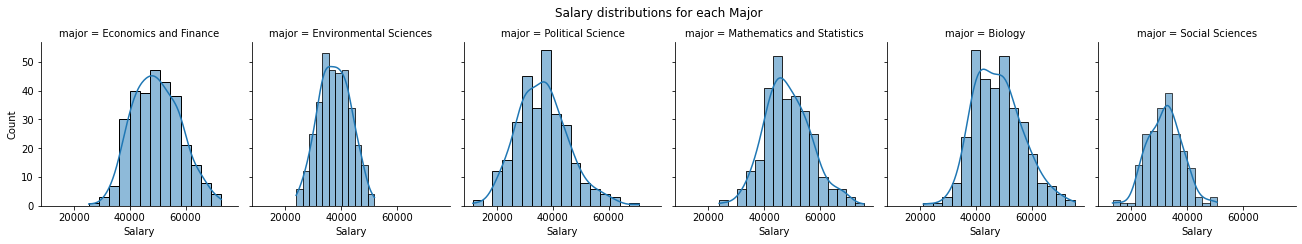

In [17]:
g = sns.FacetGrid(students_df, col="major")
g.map_dataframe(sns.histplot, x="salary", kde=True);
g.set_axis_labels("Salary", "Count")
g.fig.suptitle("Salary distributions for each Major", y=1.05);

Each of these distributions look to be fairly normally distributed. However to confirm this, I will use the Shapiro-Wilk test. A reminder that a P-value below 0.05 rejects the null hypothesis that the data is normally distributed. In order to meet assumption 5, the P-value must be above 0.05

One thing to keep in mind is that Shaprio-Wilk test should not be used on arrays with more than 5000 observations, as the P-value can become inaccurate. I will introduce an alternative method for larger datasets towards the end of this notebook.

In [18]:
# Slicing the dataset for each major
env_df = students_df[students_df['major'] == 'Environmental Sciences']
bio_df = students_df[students_df['major'] == 'Biology']
ecf_df = students_df[students_df['major'] == 'Economics and Finance']
pos_df = students_df[students_df['major'] == 'Political Science']
mas_df = students_df[students_df['major'] == 'Mathematics and Statistics']
sos_df = students_df[students_df['major'] == 'Social Sciences']

# Creating a dictionary for me to iterate through.
df_dict = {'Environmental Sciences': env_df, 
           'Biology': bio_df, 
           'Economics and Finance': ecf_df,
          'Political Science': pos_df,
          'Mathematics and Statistics': mas_df,
          'Social Sciences': sos_df}

# Creating a list to store the names of any majors that pass the Shapiro-Wilk test
normal_independent_variables = []

# Perform the Shapiro Wilk test on each dataframe. Print the result, and add to normal_majors if p_value is above 0.05
for major, data in df_dict.items():
    statistic, p_value = stats.shapiro(data['salary'])
    print(f'{major} Shapio-Wilks test P-Value: {str(p_value)}')
    if p_value >= 0.05:
        normal_independent_variables.append(major)
        
print('\nNormally distributed independent variables (p>0.05): ')
print(*normal_independent_variables, sep = ", ") 


Environmental Sciences Shapio-Wilks test P-Value: 0.22378472983837128
Biology Shapio-Wilks test P-Value: 0.0033741146326065063
Economics and Finance Shapio-Wilks test P-Value: 0.16668261587619781
Political Science Shapio-Wilks test P-Value: 0.010123440064489841
Mathematics and Statistics Shapio-Wilks test P-Value: 0.0942251980304718
Social Sciences Shapio-Wilks test P-Value: 0.603469967842102

Normally distributed independent variables (p>0.05): 
Environmental Sciences, Economics and Finance, Mathematics and Statistics, Social Sciences


Of the six majors, four are normally distributed. I will therefore continue with these four for now, as they pass assumption 5) The dependent variable should be normally distributed for each group. 

I will return to the other majors later, as we can run the Kruskal-Wallis H Test instead of ANOVA in such situations. https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php  <br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

### Checking for Homogeneity of Variance

I have one assumption left to check - the homogeneity of variance. For this I can use Levene's test again (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). Like the Shapiro-Wilk test, the Levene's test will ouput a P-Value, and if its greater than 0.05 we can assume homogeneity of variance.

In [19]:
# Doing Levene's test against the four dataframes that passed the normality assumptuon.
statistic, pvalue = stats.levene(env_df['salary'], 
                            ecf_df['salary'], 
                            mas_df['salary'], 
                            sos_df['salary'])

print(f"Levene's test P-Value: {pvalue}")
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test P-Value: 1.0769895950989218e-12
The groups do not have homogeneity of variance!


When all four majors are included, the homogeneity of variance assumption is not met as the P-value is far below 0 (e-12 tells us that there are 11 0s before the 1, and so it's actually 0.000000000001). 

For now, I continue with two majors that I know do have homogeneity of variance - Economics & Finance, and Maths & Statistics.

In [20]:
statistic, pvalue = stats.levene(ecf_df['salary'], 
                                 mas_df['salary'])

print(f"Levene's test P-Value: {pvalue}")
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test P-Value: 0.44704786466598634
The groups do have homogeneity of variance!


These two have a much higher P-Value, and so meet the last assumption for ANOVA. 

### One Way ANOVA

We now have two groups that meet all six of the ANOVA assumptions, and so we can now run the ANOVA analysis to see if there is a significant difference between the two groups.

In [21]:
statistic, pvalue = stats.f_oneway(ecf_df['salary'], mas_df['salary'])

print(f"ANOVA P-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

ANOVA P-value: 0.07324612866614046
The groups are not significantly different!


### Conclusion

This P-Value is above 0.05, and so we should not reject the null hypothesis that all groups have the same salary. It looks like Economics & Finance and Mathematics & Statistics majors have similar salary distributions, which is reassuring.

Before moving on, I should point out that because we only have two groups in this scenario, we can actually use a T-Test instead of ANOVA. Both will provide the same result, but whereas ANOVA can analyse more than 2 groups, the T-Test should only be used to compare one group to another. (https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/). The T-Test can also be performed via Scipy.Stats. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [22]:
statistic, pvalue = stats.ttest_ind(ecf_df['salary'], mas_df['salary'])

print(f"T-Test P-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

T-Test P-value: 0.07324612866615295
The groups are not significantly different!


As expected, the results are exactly the same as we saw with ANOVA.

## Anova Variations

Above we've seen two examples of a standard ANOVA used on ideal datasets (after some cleaning). However in situations where our data doesn't meet all six assumptions, hope is not lost. There are other forms of ANOVA or alternative techniques that can be utilized when datasets miss one or two of the assumptions.

### Welch's ANOVA - For when groups lack homogeneity of variance

We saw before that when we ran Levene's test on all four of our normally distributed independent variables in the Students dataset, the test found that they did not have homogeneity of variances, and so were not suitable for ANOVA. In situations like this, we can instead use Welch's ANOVA. This is available via the Statsmodels library https://www.statisticshowto.com/welchs-anova/<br>
https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html

In [23]:
from statsmodels.stats import oneway

statistic, pvalue = oneway.anova_oneway([env_df['salary'], 
                            ecf_df['salary'], 
                            mas_df['salary'], 
                            sos_df['salary']])

print(f"Welch's ANOVA P-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

Welch's ANOVA P-value: 2.623052455425018e-131
The groups are significantly different!


Here we can see that the P-Value is far below 0.05 (the e-131 tells us that there's 130 0's after the decimal point), and so there's certainly a statistical significant difference between these groups. However, again it doesn't tell us which groups are significantly different from each other. For this we will need to run a post-hoc test.

### Post-Hoc Analysis for Welch's ANOVA

In the Diet example, we were able to use Tukey's HSD test because the dataset met the assumption of homogeneity of variance. However, in this example we have had to use Welch's ANOVA due to the differing variances. Fortunately, there is the Games-Howell Post-Hoc Multiple Comparisons Test which acts very similarly to Tukey's HSD test. At present, the only Python library I have found with this test available is Pinguoin (https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html).

In [24]:
# Using the list of normally distributed majors we created earlier to filter the dataframe.
gameshowell_df = students_df[students_df['major'].isin(normal_independent_variables)]

In [25]:
import pingouin as pg

# data is the dataframe
# dv is the dependent variable (salary)
# betwen is the independent variable (major)
pg.pairwise_gameshowell(data=gameshowell_df, dv='salary',
                        between='major').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Economics and Finance,Environmental Sciences,49696.172,37652.678,12043.494,582.379,20.680,501.087,0.001,1.638
1,Economics and Finance,Mathematics and Statistics,49696.172,48443.507,1252.665,697.901,1.795,580.968,0.277,0.148
2,Economics and Finance,Social Sciences,49696.172,32044.006,17652.166,656.922,26.871,497.983,0.001,2.436
3,Environmental Sciences,Mathematics and Statistics,37652.678,48443.507,-10790.829,580.435,-18.591,492.009,0.001,-1.482
4,Environmental Sciences,Social Sciences,37652.678,32044.006,5608.672,530.457,10.573,403.291,0.001,0.930
5,Mathematics and Statistics,Social Sciences,48443.507,32044.006,16399.501,655.199,25.030,491.296,0.001,2.280


This results table doesn't explicitly call out which combinations should reject the null hypothesis, however we can go through and look at the "pval" column one by one to see for ourselves.

### Conclusion
From this we can see that most of the above combinations are statistically sigificantly different from each other. The only combination that is not statistically significant is the Economics & Finance and Mathematics & Statistics pairing, which we had already established via the ANOVA and T-Test above.

## Shapiro-Wilks alternative for large datasets (>5000 observations)

Previously we used the Shapiro-Wilks test to check whether or not the dependent variable is from a normal distribution, however if we take a look at the description in Scipy.Stats' documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), we see that:

```For N > 5000 the W test statistic is accurate but the p-value may not be.```

In situations where we have more than 5000 observations, the P-value becomes less trustworthy, and so other tests should be considered. One such test is the Anderson-Darling test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson). The Anderson-Darling test can test for a number of different distributions, with the normal distribution being among the available options. 

To show a quick example of this test, I'll load in the Irish Weather dataset. I sourced this dataset from Kaggle (https://www.kaggle.com/conorrot/irish-weather-hourly-data), and it includes the hourly weather measurements from numerous weather stations across Ireland from January 1st 1990 to June 1st 2020. Needless to say, the original dataset is massive, and so I've just taken the Athenry data to show here.

In [26]:
# Load the dataset into a Pandas dataframe
weather_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/irish_weather.csv')

# temp is currently a string, so I'm converting it to a float by removing the punctuation first.
weather_df['temp'] = weather_df['temp'].str.extract(r'(\d+.\d+)').astype('float')

# Some measurements are missing, so dropping them.
weather_df = weather_df[weather_df['temp'].notna()]

print(f"The weather dataset now has {len(weather_df)} observations.")

The weather dataset now has 76202 observations.


With the data now loaded, we can take a look at the distribution of the temperatures during this time.

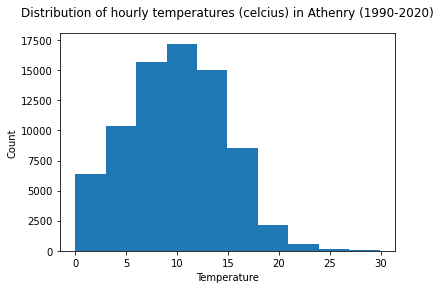

In [27]:
plt.hist(weather_df["temp"]);
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Distribution of hourly temperatures (celcius) in Athenry (1990-2020)", y=1.05);

Anyone living around East Galway wouldn't be surprised by this distribution of temperatures. While it does have a rough normal shape, it is right-skewed and so may not actually be from a normal distribution.

Let's try the Shaprio-Wilks test first and see how that looks. Remember, the P-value here is less reliable over 5000 observations, and we have 76202 in this dataset.

In [28]:
pvalue = stats.shapiro(weather_df['temp'])[1]

print(f"Shapiro-Wilks P-value: {pvalue}")

Shapiro-Wilks P-value: 0.0


/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A P-value of 0.0, coupled with the warning from Scipy, suggests that the test did not work in this scenario, and so it's time to use the Anderson-Darling test instead.

As previously mentioned, we can select from a few distribution options for this test, and so I'll be using 'norm' in this case.

In [29]:
stats.anderson(weather_df['temp'], dist='norm')

AndersonResult(statistic=90.00576422091399, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

The results for the Anderson-Darling test look very different to the previous tests we've looked at, which only returned a test statistic and the p-value. 

In this case, we have a test statistic (statistic), an array of critical values and their corresponding significance levels. 

If the test statistic is higher than the critical value at any particular significant level, then we reject the null hypothesis that the data is from a normal distribution.

Throughout this notebook we have been using 0.05 as our significant threshold, and so it is the "5." significance level we need to look at here. The corresponding critical value for this significant value is 0.787, and the test statistic is 90. The test is therefore telling us to reject the null hypothesis, and that this data is not from a normal distribution.

Had the test statistic been below the critical value, the dependent variable would have passed assumption 5 (the dependent variable should be normally distributed for each group) and we could have continued checking the data against the final assumption.

# Notes - Things to be done!
* Create a Type 1 / Type 2 error graphic.

Resources

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6532382/<br>
https://www.youtube.com/watch?v=0Vj2V2qRU10 <br>
https://www.qualtrics.com/uk/experience-management/research/anova/ <br>
https://online.stat.psu.edu/stat500/book/export/html/479<br>
https://www.scribbr.com/statistics/one-way-anova/<br>
https://learning.edanz.com/anova-explained/<br>
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/<br>
https://towardsdatascience.com/analysis-of-variance-anova-8dc889d2fc3a<br>
https://towardsdatascience.com/what-is-anova-and-when-do-we-use-it-e0dcd8759c4e<br>
https://medium.com/@peterflom/anova-why-analyze-variances-to-compare-means-e3d4bbd3c05<br>
https://towardsdatascience.com/anovas-three-types-of-estimating-sums-of-squares-don-t-make-the-wrong-choice-91107c77a27a<br>
https://medium.com/omarelgabrys-blog/statistics-probability-t-distribution-anova-d1422928e3a<br>

## More Resources

Ancova tutorial - https://statistics.laerd.com/spss-tutorials/ancova-using-spss-statistics.php
* Similar to ANOVA but allows you to control for a 3rd measurement. e.g. if I'm looking at exercise and heartrate, but want to control for age.